In [380]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import RidgeCV,LinearRegression,SGDRegressor,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

In [381]:
dataset = pd.read_csv("Fish.csv")

In [382]:
dataset.head(5)

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [383]:
dataset.describe()

,weight,length1,length2,length3,height,width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [384]:
one_hot_enc = pd.get_dummies(dataset.species, prefix='species')
fdata = pd.concat([dataset,one_hot_enc],axis=1).drop(columns=["species"])
fdata

,weight,length1,length2,length3,height,width,species_Bream,species_Parkki,species_Perch,species_Pike,species_Roach,species_Smelt,species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


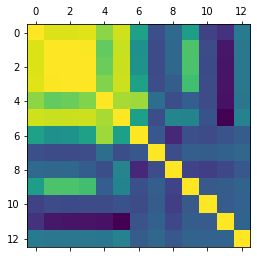

In [385]:
cord = fdata.corr()
plt.matshow(cord)
plt.show()

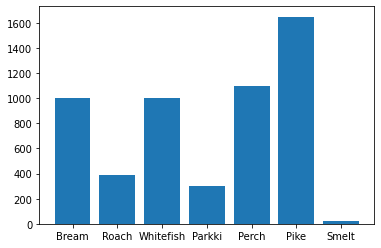

In [386]:
plt.bar(dataset['species'],dataset['weight'])
plt.show()

In [387]:
def feature_ext(fdata):
    y = fdata['weight']
    y=y.astype('int')
    X = fdata.drop(columns=['weight']) # ,'length1','length2','length3'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    return X_train, X_test, y_train, y_test
    # return X,y

In [388]:
def poly_feature(features, degree_):
    poly = PolynomialFeatures(degree=degree_)
    return poly.fit_transform(features)

In [389]:
def linear_regress(X,y):
    regressed_model = LinearRegression(normalize=True)
    return regressed_model.fit(X, y)

In [390]:
def model_metrics(model,test_x,test_y):
    y_pred = model.predict(test_x)
    return [y_pred, model.coef_, mean_squared_error(test_y, y_pred), r2_score(test_y, y_pred)]

In [391]:
def plot_pred(predictions,label):
    plt.scatter(predictions, label, color="blue")
    plt.scatter(label, label, color="red", linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.title("Expected vs The Model")
    plt.show()

In [480]:
def error_plotter(y_true,y_pred):
    df = pd.DataFrame({"tr":y_true,"pr":y_pred})    
    df["error"] = (df["tr"] - df["pr"]).apply(lambda x: abs(x))
    df["error_perc"] = df['error'] / df['tr'] * 100
    plt.scatter(df['tr'],df['error'], color="blue")
    plt.scatter(df['tr'],df['error_perc'], color="red")
    plt.axhline(y=0, color='black', linestyle='-')

    plt.yscale("log")
    plt.show()

In [393]:
def save_model(fname,clf):
    pickle.dump(clf, open(fname, 'wb'))

In [394]:
#X,y = feature_ext(fdata)

In [395]:
X_train, X_test, y_train, y_test = feature_ext(fdata)

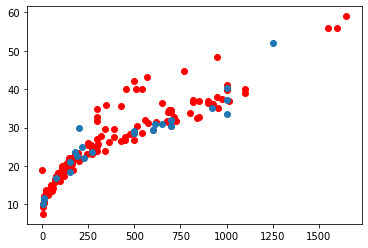

In [396]:
plt.scatter(y_train,X_train['length1'],color="red")
plt.scatter(y_test,X_test['length1'])
plt.show()

In [482]:
X_ = poly_feature(X_train, 2)
X_test_ = poly_feature(X_test, 2)

In [483]:
y = y_train

In [484]:
model = linear_regress(X_, y)

In [485]:
metrics = model_metrics(model,X_test_,y_test)
print(metrics[2:4])

[5610.833333333333, 0.9582106869847608]


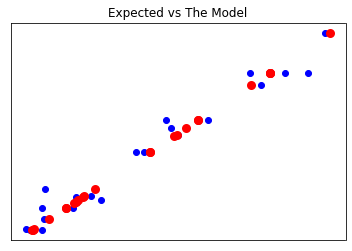

In [486]:
plot_pred(metrics[0],y_test)

In [487]:
from sklearn.metrics import mean_absolute_percentage_error

In [488]:
mean_absolute_percentage_error(metrics[0],y_test)

1876499844737707.0

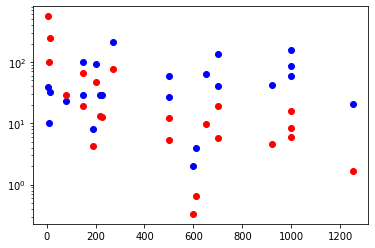

In [489]:
error_plotter(y_test,metrics[0])

In [490]:
# save_model("final_model.sav",model)

In [491]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV(cv=4, normalize=False, max_iter=50).fit(X_, y)

In [492]:
print(list(zip(reg.predict(X_test_),y_test)))

[(82.06238285105266, 78), (-10.15011949427874, 13), (170.06656763352646, 200), (260.33443509028064, 270), (142.1441192906218, 150), (896.2739968152216, 1000), (-13.354300601216394, 7), (204.004400114401, 180), (207.9785246364222, 188), (1308.1394578228897, 1250), (610.28121268345, 650), (852.3217292449816, 1000), (579.6327285483906, 600), (137.9464822338728, 150), (680.9827095241759, 700), (895.4476262426131, 920), (1100.2349126804006, 1000), (246.03622467952493, 218), (189.16752114925998, 225), (571.3875681609052, 700), (-12.764263035402593, 10), (588.119077522385, 610), (444.2465201521672, 500), (476.0603710605881, 500)]


In [493]:
metrics22 = model_metrics(reg,X_test_,y_test)
print(metrics22[2:4])

[3140.8453167365897, 0.9766070812879453]


In [494]:
mean_absolute_percentage_error(metrics22[0],y_test)

0.3137068227633229

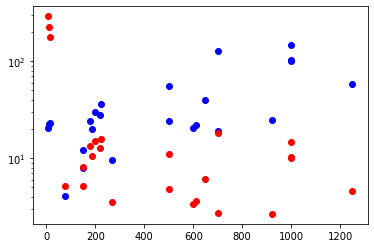

In [495]:
error_plotter(y_test,metrics22[0])

In [496]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor(random_state=2)
reg2 = RandomForestRegressor(random_state=2)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_, y)

In [497]:
print(list(zip(ereg.predict(X_test_),y_test)))

[(84.6155806923491, 78), (17.985655179356254, 13), (300.50667549426754, 200), (224.5446289237349, 270), (117.33841637506286, 150), (909.8853167841007, 1000), (4.415825892781714, 7), (229.5332682568196, 180), (184.30290576419793, 188), (1321.8899591187999, 1250), (629.7831950743813, 650), (970.4836863551977, 1000), (615.334286490855, 600), (133.4604342958775, 150), (685.7205752810283, 700), (935.7129211504686, 920), (1137.832338881376, 1000), (232.16044309713618, 218), (176.58559886103728, 225), (626.9385442960905, 700), (12.652114349245311, 10), (566.4679187066255, 610), (371.46525203347556, 500), (487.19866569557803, 500)]


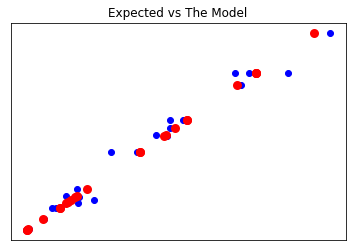

In [498]:
plot_pred(ereg.predict(X_test_),y_test)

In [499]:
y_pred = ereg.predict(X_test_)
mean_squared_error(y_test, y_pred)

3198.8607884277953

In [500]:
mean_absolute_percentage_error(y_pred,y_test)

0.15107089191982018

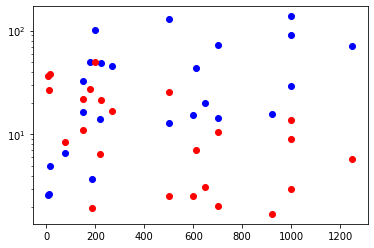

In [501]:
error_plotter(y_test,y_pred)

In [502]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', RidgeCV()),('lasso', LassoCV(tol=1e-3)), ('knr', KNeighborsRegressor(n_neighbors=15,metric='euclidean'))]
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

final_estimator = GradientBoostingRegressor(subsample=0.95)
reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

ert = reg.fit(X_, y_train)

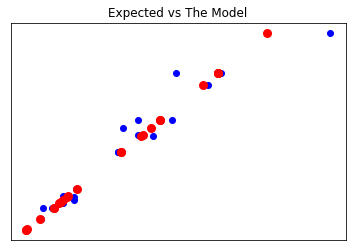

In [503]:
plot_pred(ert.predict(X_test_),y_test)

In [504]:
y_pred_8 = ert.predict(X_test_)
mean_squared_error(y_test, y_pred_8)

8628.18627414501

In [505]:
mean_absolute_percentage_error(y_pred_8,y_test)

0.12600897068756564

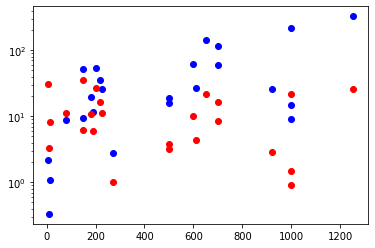

In [506]:
error_plotter(y_test,y_pred_8)

In [507]:
from sklearn.linear_model import HuberRegressor, LinearRegression

In [508]:
huber = HuberRegressor(tol=1, max_iter=100000).fit(X_, y_train)

C:\Python Envs\jupyter\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [509]:
huber.score(X_test_, y_test)

0.9809355560119409

In [510]:
y_pred_1 = huber.predict(X_test_)
mean_squared_error(y_test, y_pred_1)

2559.6835671995927

In [511]:
mean_absolute_percentage_error(y_pred_1,y_test)

0.10572915683517319

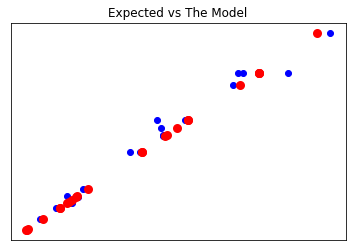

In [512]:
plot_pred(y_pred_1,y_test)

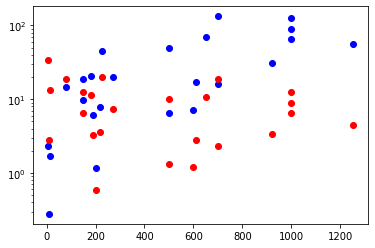

In [513]:
error_plotter(y_test,y_pred_1)

In [514]:
X = X_train
y= y_train

In [515]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
reg22 = RANSACRegressor()
eryu = reg22.fit(X_, y_train)

In [516]:
reg22.score(X_test_, y_test)

0.9634381525662208

In [517]:
y_pred_4 = reg22.predict(X_test_)
mean_squared_error(y_test, y_pred_4)


4908.968765169382

In [518]:
mean_absolute_percentage_error(y_pred_4,y_test)

7.981759424565176

In [519]:
save_model("RANSACRegressor_model.sav",reg22)

In [472]:
"""import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

# Generate toy data.
rng = np.random.RandomState(0)
# Add four strong outliers to the dataset.
plt.scatter(X['length1'], y)

colors = ["r-", "b-", "y-", "m-"]

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon, tol=1,max_iter=10000)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(alpha=0.0, random_state=0)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, "g-", label="ridge regression")

plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()"""

'import numpy as np\nimport matplotlib.pyplot as plt\n\nfrom sklearn.datasets import make_regression\nfrom sklearn.linear_model import HuberRegressor, Ridge\n\n# Generate toy data.\nrng = np.random.RandomState(0)\n# Add four strong outliers to the dataset.\nplt.scatter(X[\'length1\'], y)\n\ncolors = ["r-", "b-", "y-", "m-"]\n\nx = np.linspace(X.min(), X.max(), 7)\nepsilon_values = [1, 1.5, 1.75, 1.9]\nfor k, epsilon in enumerate(epsilon_values):\n    huber = HuberRegressor(alpha=0.0, epsilon=epsilon, tol=1,max_iter=10000)\n    huber.fit(X, y)\n    coef_ = huber.coef_ * x + huber.intercept_\n    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)\n\n# Fit a ridge regressor to compare it to huber regressor.\nridge = Ridge(alpha=0.0, random_state=0)\nridge.fit(X, y)\ncoef_ridge = ridge.coef_\ncoef_ = ridge.coef_ * x + ridge.intercept_\nplt.plot(x, coef_, "g-", label="ridge regression")\n\nplt.title("Comparison of HuberRegressor vs Ridge")\nplt.xlabel("X")\nplt.ylabel("y")\nplt